# Classification of Pelicam Photos

By Jack Wilburn, Jaimi Butler (GSLI)

## Import Packages and Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from skimage.data import camera
from skimage.filters import roberts, sobel, scharr, prewitt

from scipy import misc

import glob

from PIL import Image

import math

## Import Images into Array as Grayscale ('LA')

In [32]:
# Import one image into an array
# arr = misc.imread('PeliPhotos1Folder/20170308185500.jpg')

# Import multiple images into an array
photos = np.empty([len(glob.glob("PeliPhotos1Folder/*.jpg")), 2], dtype = object)

j = 0
for i in glob.glob("PeliPhotos1Folder/*.jpg"):
    photos[j,1] = Image.open(i)
    if photos[j,1].verify() == None:
        pass
    else:
        photos[j,1] = None
    photos[j,0] = str(i)
    j +=1



In [34]:
print photos[1,1]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x720 at 0x1C21786750>


In [ ]:
import sys
print str(sys.getsizeof(photos)/1024) + "MB"

The above code generates a 2 dimensional matrix and embeds a 3 dimensional matrix inside. I'm sure this is inefficient and needs optimization but I'm not certain how to import this much data in a good manner, yet.

## Display image to see if it imported correctly

TypeError: Image data cannot be converted to float

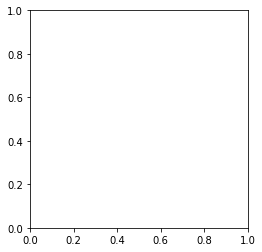

In [9]:
plt.imshow(photos[50000,1], interpolation='nearest')
plt.show()

We see that this image has indeed imported correctly and is stored as we desired in the array. To actually access the picture as an array, you'd need to use the code below. This is a 3 dimensional matrix, the last dimension has 2 values, the actual value of the brightness (in value 0) and the max possible brightness, 255, in each position of value 1. Theoretically, we could remove value 1 from this layer for all as it doesn't add any new info and takes up more space in RAM.

In [ ]:
np.array(photos[0,1])[300,150,0]

## Subsetting Data

Now that we have the data imported, we need to separate out into a training and testing set. The best way to do this will be to have some people manually look at some of the pictures and do data entry so that we can build our algorithm from pictures that we know are classified correctly. 

In [ ]:
import os
from shutil import copyfile

# List all files from the directory and initialize array
l = os.listdir('PeliPhotos1Folder/')
array = np.empty((1011,1), dtype = object)

# Iterate through files picking every 52nd file to get 1011 files for our training set and copy pictures to 
# new folder for manual input
i = 0
for n in l[::52]:
    array[i,0] = n
    # Ran once so doesn't need running again
    # copyfile('PeliPhotos1Folder/' + n, 'Training_data/' + n)
    i += 1

# Output array for manual input (ran once so doesn't need running again)
#array.tofile("Training_Data.csv", sep = " \n")